<a href="https://colab.research.google.com/github/rodrigosimass/mnist_FFNN_CNN/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up



In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import KFold
import numpy as np
import sklearn.decomposition
import matplotlib.pyplot as plt

In [0]:
mnist_data, mnist_info = tfds.load('mnist', with_info=True)
mnist_train_x = np.asarray([instance['image']/255 for instance in tfds.as_numpy(mnist_data['train'])])
mnist_train_y = np.asarray([instance['label'] for instance in tfds.as_numpy(mnist_data['train'])])
mnist_test_x = np.asarray([instance['image']/255 for instance in tfds.as_numpy(mnist_data['test'])])
mnist_test_y = np.asarray([instance['label'] for instance in tfds.as_numpy(mnist_data['test'])])

In [0]:
def isBest(result, results):
  if(len(results)==0):
    return True
  if(result>max(results)):
    return True
  return False

def avg(lst): 
    return sum(lst) / len(lst)

In [0]:
def KFoldcrossValidation(K,model,train_x,train_y, _epochs, _batch_size, _verbose, model_save_file):
    kf = KFold(n_splits=K)
    val_acc = []
    train_acc = []
    i = 1

    print("CROSS VALIDATION STARTED")
    for train_idx, val_idx in kf.split(train_x, train_y):
        #SPLIT THE DATA
        print("Fold ",i,"/",K)
        i = i+1
        train_x = mnist_train_x[train_idx]
        train_y = mnist_train_y[train_idx]
        val_x = mnist_train_x[val_idx]
        val_y = mnist_train_y[val_idx]
        val_set = (val_x, val_y)

        earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=0)
        checkpoint_valid = tf.keras.callbacks.ModelCheckpoint('best_val'+str(i)+'.h5', monitor='val_accuracy', verbose=0, save_best_only=True)
        checkpoint_train = tf.keras.callbacks.ModelCheckpoint('bes_train'+str(i)+'.h5', monitor='accuracy', verbose=0, save_best_only=True)

        print(checkpoint_valid.best)
        print(checkpoint_train.best)

        train = model.fit(train_x, train_y, validation_data= val_set, callbacks=[earlystop,checkpoint_valid,checkpoint_train], epochs=_epochs, batch_size=_batch_size, verbose=_verbose)

        val_acc.append(checkpoint_valid.best)
        train_acc.append(checkpoint_train.best)
        #tf.keras.backend.clear_session()

    fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

    loss_ax.set_title('Loss')
    loss_ax.plot(train.history['loss'], '-r', label='Train')
    loss_ax.plot(train.history['val_loss'], '-g', label='Validation')
    acc_ax.set_title('Accuracy')
    acc_ax.plot(train.history['accuracy'], '-r', label='Train')
    acc_ax.plot(train.history['val_accuracy'], '-g', label='Validation')
    plt.legend(loc=4)
    plt.show()

    return (avg(val_acc),avg(train_acc))

# Baseline

cross-validation to assess average validation and train accuracy

Fold  1 / 5
Epoch 1/10000
188/188 [==============================] - 1s 4ms/step - loss: 1.6847 - accuracy: 0.5512 - val_loss: 1.2535 - val_accuracy: 0.7510
Epoch 2/10000
188/188 [==============================] - 1s 3ms/step - loss: 1.0630 - accuracy: 0.7842 - val_loss: 0.9225 - val_accuracy: 0.8134
Epoch 3/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.8402 - accuracy: 0.8227 - val_loss: 0.7743 - val_accuracy: 0.8354
Epoch 4/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.7278 - accuracy: 0.8391 - val_loss: 0.6897 - val_accuracy: 0.8466
Epoch 5/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.6590 - accuracy: 0.8488 - val_loss: 0.6341 - val_accuracy: 0.8545
Epoch 6/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.6118 - accuracy: 0.8552 - val_loss: 0.5944 - val_accuracy: 0.8602
Epoch 7/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.5772 - accuracy: 0.8605 - val_loss: 0.5

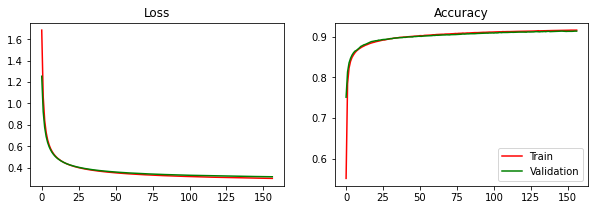

Fold  2 / 5
Epoch 1/10000
188/188 [==============================] - 1s 4ms/step - loss: 1.7434 - accuracy: 0.5240 - val_loss: 1.2857 - val_accuracy: 0.7523
Epoch 2/10000
188/188 [==============================] - 1s 3ms/step - loss: 1.0811 - accuracy: 0.7856 - val_loss: 0.9373 - val_accuracy: 0.8080
Epoch 3/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.8488 - accuracy: 0.8205 - val_loss: 0.7836 - val_accuracy: 0.8308
Epoch 4/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.7331 - accuracy: 0.8360 - val_loss: 0.6963 - val_accuracy: 0.8394
Epoch 5/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.6626 - accuracy: 0.8457 - val_loss: 0.6393 - val_accuracy: 0.8488
Epoch 6/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.6146 - accuracy: 0.8537 - val_loss: 0.5989 - val_accuracy: 0.8558
Epoch 7/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.5794 - accuracy: 0.8592 - val_loss: 0.5

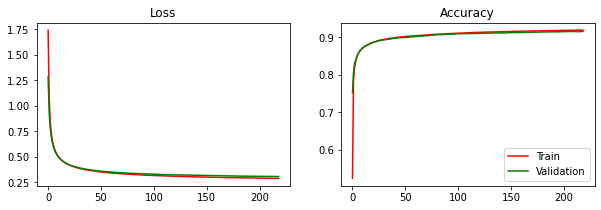

Fold  3 / 5
Epoch 1/10000
188/188 [==============================] - 1s 4ms/step - loss: 1.6968 - accuracy: 0.5499 - val_loss: 1.2627 - val_accuracy: 0.7492
Epoch 2/10000
188/188 [==============================] - 1s 3ms/step - loss: 1.0647 - accuracy: 0.7862 - val_loss: 0.9286 - val_accuracy: 0.8102
Epoch 3/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.8410 - accuracy: 0.8213 - val_loss: 0.7796 - val_accuracy: 0.8283
Epoch 4/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.7285 - accuracy: 0.8372 - val_loss: 0.6942 - val_accuracy: 0.8423
Epoch 5/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.6595 - accuracy: 0.8475 - val_loss: 0.6381 - val_accuracy: 0.8512
Epoch 6/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.6123 - accuracy: 0.8548 - val_loss: 0.5981 - val_accuracy: 0.8569
Epoch 7/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.5775 - accuracy: 0.8597 - val_loss: 0.5

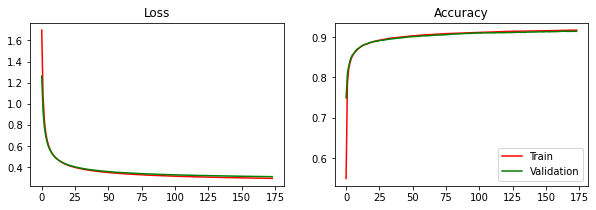

Fold  4 / 5
Epoch 1/10000
188/188 [==============================] - 1s 4ms/step - loss: 1.6930 - accuracy: 0.5488 - val_loss: 1.2614 - val_accuracy: 0.7427
Epoch 2/10000
188/188 [==============================] - 1s 3ms/step - loss: 1.0675 - accuracy: 0.7800 - val_loss: 0.9300 - val_accuracy: 0.8070
Epoch 3/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.8446 - accuracy: 0.8187 - val_loss: 0.7802 - val_accuracy: 0.8289
Epoch 4/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.7312 - accuracy: 0.8348 - val_loss: 0.6943 - val_accuracy: 0.8428
Epoch 5/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.6616 - accuracy: 0.8454 - val_loss: 0.6378 - val_accuracy: 0.8510
Epoch 6/10000
188/188 [==============================] - 1s 4ms/step - loss: 0.6138 - accuracy: 0.8536 - val_loss: 0.5975 - val_accuracy: 0.8581
Epoch 7/10000
188/188 [==============================] - 1s 4ms/step - loss: 0.5788 - accuracy: 0.8596 - val_loss: 0.5

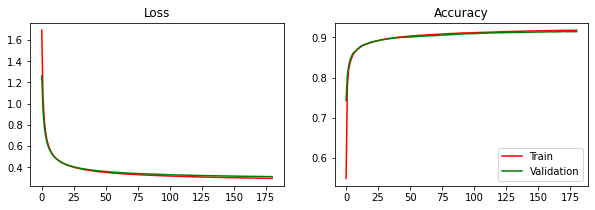

Fold  5 / 5
Epoch 1/10000
188/188 [==============================] - 1s 4ms/step - loss: 1.7177 - accuracy: 0.5488 - val_loss: 1.2664 - val_accuracy: 0.7548
Epoch 2/10000
188/188 [==============================] - 1s 4ms/step - loss: 1.0639 - accuracy: 0.7948 - val_loss: 0.9249 - val_accuracy: 0.8151
Epoch 3/10000
188/188 [==============================] - 1s 4ms/step - loss: 0.8369 - accuracy: 0.8279 - val_loss: 0.7744 - val_accuracy: 0.8365
Epoch 4/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.7238 - accuracy: 0.8416 - val_loss: 0.6889 - val_accuracy: 0.8469
Epoch 5/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.6550 - accuracy: 0.8495 - val_loss: 0.6330 - val_accuracy: 0.8555
Epoch 6/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.6080 - accuracy: 0.8564 - val_loss: 0.5933 - val_accuracy: 0.8615
Epoch 7/10000
188/188 [==============================] - 1s 3ms/step - loss: 0.5735 - accuracy: 0.8610 - val_loss: 0.5

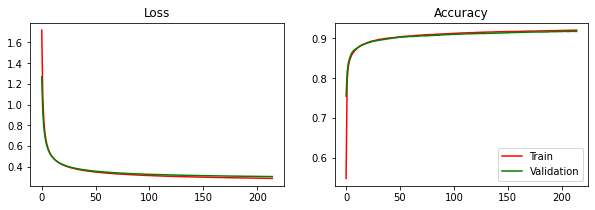

avg:valid= 0.9151833295822144   avg_train= 0.9181833267211914


In [60]:
num_folds = 5
kf = KFold(n_splits=num_folds)
valid_acc = []
train_acc = []
i = 1
for train_idx, val_idx in kf.split(mnist_train_x, mnist_train_y):
    print("Fold ",i,"/",num_folds)
    i = i+1
    #SPLIT THE DATA
    train_x = mnist_train_x[train_idx]
    train_y = mnist_train_y[train_idx]
    val_x = mnist_train_x[val_idx]
    val_y = mnist_train_y[val_idx]
    val_set = (val_x, val_y)

    #BUILD MODEL
    mnist_baseline_model = tf.keras.Sequential(name='mnist_baseline_' + str(i))
    mnist_baseline_model.add(tf.keras.layers.Input(mnist_info.features['image'].shape))
    mnist_baseline_model.add(tf.keras.layers.Flatten(name='flatten'))
    mnist_baseline_model.add(tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output'))
    mnist_baseline_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    #DEFINE CALL BACKS
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=0)
    checkpoint_valid = tf.keras.callbacks.ModelCheckpoint('mnist_baseline_best.h5', monitor='val_accuracy', verbose=0, save_best_only=True)
    checkpoint_train = tf.keras.callbacks.ModelCheckpoint('mnist_baseline_best.h5', monitor='accuracy', verbose=0, save_best_only=True)

    #TRAIN MODEL
    train = mnist_baseline_model.fit(mnist_train_x, mnist_train_y, validation_split=0.2, callbacks=[earlystop,checkpoint_valid,checkpoint_train], epochs=10000, batch_size=256)
    
    #SAVE BEST ACCURACY TO LIST
    valid_acc.append(checkpoint_valid.best)
    train_acc.append(checkpoint_train.best)

    #PRINT FIGURE
    fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(10,3))

    loss_ax.set_title('Loss')
    loss_ax.plot(train.history['loss'], '-r', label='Train')
    loss_ax.plot(train.history['val_loss'], '-g', label='Validation')
    acc_ax.set_title('Accuracy')
    acc_ax.plot(train.history['accuracy'], '-r', label='Train')
    acc_ax.plot(train.history['val_accuracy'], '-g', label='Validation')
    plt.legend(loc=4)
    plt.show()
#PRINT AVERAGE ACCURACY
print("avg:valid=",avg(valid_acc),"  avg_train=", avg(train_acc))

train with the whole train set

In [63]:
tf.keras.backend.clear_session()
mnist_baseline_model = tf.keras.Sequential(name='mnist_baseline')
mnist_baseline_model.add(tf.keras.layers.Input(mnist_info.features['image'].shape))
mnist_baseline_model.add(tf.keras.layers.Flatten(name='flatten'))
mnist_baseline_model.add(tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output'))
mnist_baseline_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
earlystop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_baseline_best.h5', monitor='accuracy', verbose=0, save_best_only=True)

train = mnist_baseline_model.fit(mnist_train_x, mnist_train_y, validation_split=0.0, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=256, verbose=0)

Epoch 00236: early stopping


test the baseline

In [64]:
mnist_baseline_model.load_weights('mnist_baseline_best.h5')
loss, acc = mnist_baseline_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy: {}'.format(acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.9215
Accuracy: 0.921500027179718


#Feed-Forward Neural Networks

test several models with different number of layers and neurons

cross validation is used and the best fold is selected in order to assess performance

---



In [0]:
num_hidden_layers = [100]
num_hidden_neurons = [300]
num_folds = 5; #cross validation
eps = 10000 #epochs
patience_level = 5
model_id = 0

for layers in num_hidden_layers:
    print("\n\num_hidden_layers=",layers)
    for num_neur in num_hidden_neurons:
        kf = KFold(n_splits=num_folds)
        valid_acc = []
        train_acc = []
        fold = 1
        print("    num_neurons:",num_neur)
        for train_idx, val_idx in kf.split(mnist_train_x, mnist_train_y):
            print("    Fold ",fold,"/",num_folds)
            fold = fold+1
            #SPLIT THE DATA
            train_x = mnist_train_x[train_idx]
            train_y = mnist_train_y[train_idx]
            val_x = mnist_train_x[val_idx]
            val_y = mnist_train_y[val_idx]
            val_set = (val_x, val_y)

            #BUILD THE NN
            mlp = tf.keras.Sequential(name='FFNN_' + str(model_id))
            model_id = model_id + 1
            mlp.add(tf.keras.layers.Input(mnist_info.features['image'].shape))
            mlp.add(tf.keras.layers.Flatten(name='flatten'))
            for i in range (layers):
                nm = "HU" + str(i)
                mlp.add(tf.keras.layers.Dense(num_neur, activation='tanh', name=nm))
            mlp.add(tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output'))

            mlp.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

            #DEFINE CALL BACKS
            earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience_level, verbose=0)
            checkpoint_train = tf.keras.callbacks.ModelCheckpoint('MLP-1HU.h5', monitor='accuracy', verbose=0, save_best_only=True)
            checkpoint_valid = tf.keras.callbacks.ModelCheckpoint('multi_layer_2.h5', monitor='val_accuracy', verbose=0, save_best_only=True)

            #TRAIN
            train = mlp.fit(mnist_train_x, mnist_train_y, validation_data= val_set, callbacks=[earlystop,checkpoint_train,checkpoint_valid], epochs=eps, batch_size=256, verbose=1)

            #SAVE BEST ACCURACY TO LIST
            valid_acc.append(checkpoint_valid.best)
            train_acc.append(checkpoint_train.best)

            print("best_valid=",checkpoint_valid.best)
            print("best_train=",checkpoint_train.best)

            #PRINT FIGURE
            fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(10,3))

            loss_ax.set_title('Loss')
            loss_ax.plot(train.history['loss'], '-r', label='Train')
            loss_ax.plot(train.history['val_loss'], '-g', label='Validation')
            acc_ax.set_title('Accuracy')
            acc_ax.plot(train.history['accuracy'], '-r', label='Train')
            acc_ax.plot(train.history['val_accuracy'], '-g', label='Validation')
            plt.legend(loc=4)
            plt.show()

        #PRINT AVERAGE ACCURACY
        print("avg:valid=",avg(valid_acc),"  avg_train=", avg(train_acc))


train the best model with the whole train set

In [0]:
num_hidden_layers = 2
num_neur = 100
eps = 10000 #epochs

#BUILD THE NN
mlp = tf.keras.Sequential(name='best_FFNN')
mlp.add(tf.keras.layers.Input(mnist_info.features['image'].shape))
mlp.add(tf.keras.layers.Flatten(name='flatten'))
for j in range (num_hidden_layers):
    nm = "HU" + str(j)
    mlp.add(tf.keras.layers.Dense(num_neur, activation='tanh', name=nm))
mlp.add(tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output'))

mlp.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#DEFINE CALL BACKS
earlystop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, verbose=0)
checkpoint = tf.keras.callbacks.ModelCheckpoint('MLP-1HU.h5', monitor='accuracy', verbose=0, save_best_only=True)
#TRAIN
mlp_train = mlp.fit(mnist_train_x, mnist_train_y, validation_split = 0.0, callbacks=[earlystop,checkpoint], epochs=eps, batch_size=256, verbose=0)

plot the train:

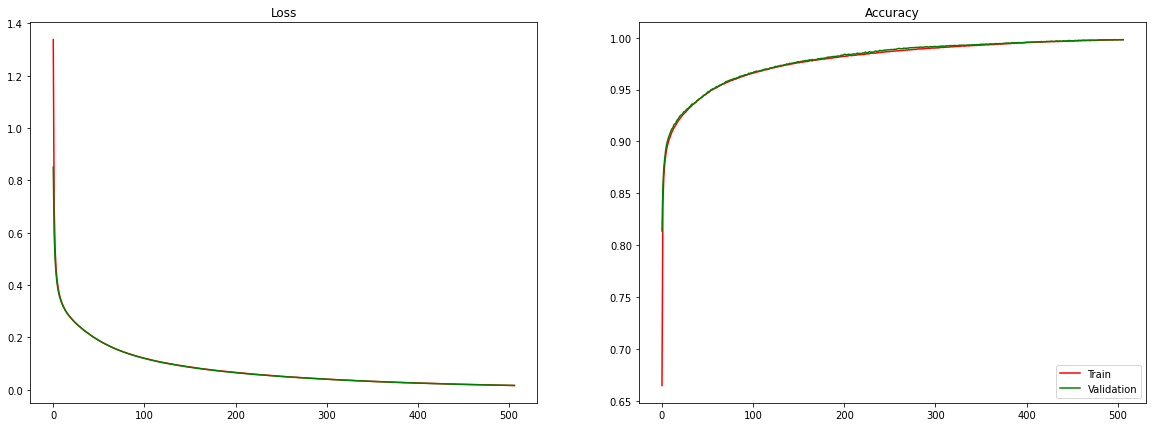

In [0]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(best_model.history['loss'], '-r', label='Train')
loss_ax.plot(best_model.history['val_loss'], '-g', label='Validation')
acc_ax.set_title('Accuracy')
acc_ax.plot(best_model.history['accuracy'], '-r', label='Train')
acc_ax.plot(best_model.history['val_accuracy'], '-g', label='Validation')
plt.legend(loc=4)
plt.show()

and finally... use the test set

In [0]:
#stats of all the folds
print("All folds:")
print(results)
#satts of best fold
print("Best fold:")
print("valid acc:",best_val)
print("train acc:",best_train)
#and finally we test
mlp.load_weights('best_MLP.h5')
loss, acc = mlp.evaluate(mnist_test_x, mnist_test_y)
print('\n---------------------------------------\n| TEST ACCURACY =  {}  |\n---------------------------------------\n'.format(acc))

All folds:
[0.9929999709129333, 0.9897500276565552, 0.996999979019165, 0.9950000047683716, 0.9981666803359985]
Best fold:
valid acc: 0.9981666803359985
train acc: 0.9980666637420654
313/313 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9778

---------------------------------------
| TEST ACCURACY =  0.9778000116348267  |
---------------------------------------



# CNN

In [0]:
CNN = tf.keras.Sequential(name='mnist_cnn')
CNN.add(tf.keras.layers.Input(mnist_info.features['image'].shape))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu', padding='same', name='convolution1'))
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, activation='relu', padding='same', name='convolution2'))
CNN.add(tf.keras.layers.Conv2D(filters=16, kernel_size=4, activation='relu', padding='same', name='convolution2'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=2, name='pooling'))
CNN.add(tf.keras.layers.Flatten(name='flatten'))
CNN.add(tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output'))

CNN.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

conv_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=0)
conv_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_conv_best.h5', monitor='val_accuracy', verbose=0, save_best_only=True)

mnist_CNN_train = CNN.fit(mnist_train_x, mnist_train_y, validation_split=0.2,callbacks=[conv_earlystop,conv_checkpoint], epochs=10000, batch_size=256, verbose = 0)

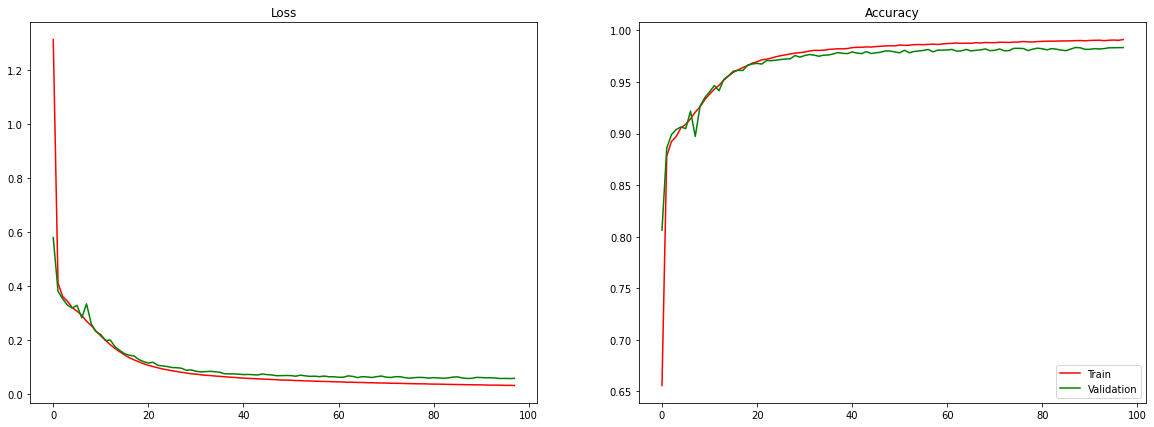

In [90]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(mnist_CNN_train.history['loss'], '-r', label='Train')
loss_ax.plot(mnist_CNN_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(mnist_CNN_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(mnist_CNN_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

In [0]:
CNN = tf.keras.Sequential(name='mnist_cnn')
CNN.add(tf.keras.layers.Input(mnist_info.features['image'].shape))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', name='convolution1'))
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', name='convolution2'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=2, name='pooling'))
CNN.add(tf.keras.layers.Dropout(0.5, name='dropout'))
CNN.add(tf.keras.layers.Flatten(name='flatten'))
CNN.add(tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output'))

CNN.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

conv_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=0)
conv_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_conv_best.h5', monitor='val_accuracy', verbose=0, save_best_only=True)

mnist_CNN_train = CNN.fit(mnist_train_x, mnist_train_y, validation_split=0.2,callbacks=[conv_earlystop,conv_checkpoint], epochs=10000, batch_size=256)


Epoch 1/10000
188/188 [==============================] - 3s 16ms/step - loss: 1.5382 - accuracy: 0.5306 - val_loss: 0.5239 - val_accuracy: 0.8576
Epoch 2/10000
188/188 [==============================] - 3s 14ms/step - loss: 0.5444 - accuracy: 0.8301 - val_loss: 0.4014 - val_accuracy: 0.8848
Epoch 3/10000
188/188 [==============================] - 3s 15ms/step - loss: 0.4649 - accuracy: 0.8577 - val_loss: 0.3660 - val_accuracy: 0.8933
Epoch 4/10000
188/188 [==============================] - 3s 14ms/step - loss: 0.4288 - accuracy: 0.8694 - val_loss: 0.3451 - val_accuracy: 0.8992
Epoch 5/10000
188/188 [==============================] - 3s 14ms/step - loss: 0.4098 - accuracy: 0.8765 - val_loss: 0.3416 - val_accuracy: 0.9030
Epoch 6/10000
188/188 [==============================] - 3s 14ms/step - loss: 0.3948 - accuracy: 0.8817 - val_loss: 0.3297 - val_accuracy: 0.9038
Epoch 7/10000
188/188 [==============================] - 3s 15ms/step - loss: 0.3798 - accuracy: 0.8862 - val_loss: 0.3218 -

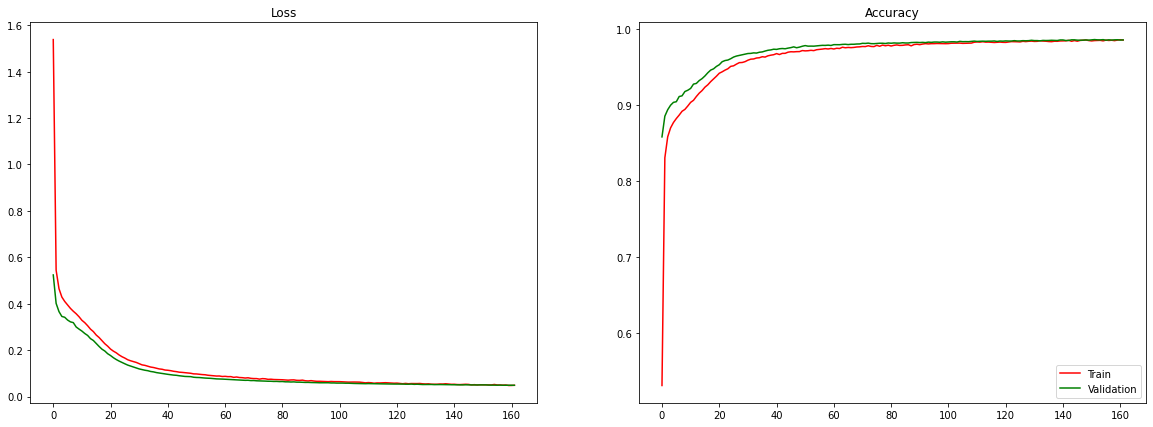

In [0]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(mnist_CNN_train.history['loss'], '-r', label='Train')
loss_ax.plot(mnist_CNN_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(mnist_CNN_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(mnist_CNN_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

In [0]:
CNN.load_weights('mnist_conv_best.h5')
loss, acc = CNN.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy: {}'.format(acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0415 - accuracy: 0.9863
Accuracy: 0.986299991607666
